## Data Downloading and Unzipping

In [ ]:
!gdown http://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ
!unzip -q dataset.zip

Downloading...
From (original): http://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ
From (redirected): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ&confirm=t&uuid=d22ba1a4-d38b-4df2-baa3-86222ecf773e
To: /content/dataset.zip
100% 1.13G/1.13G [00:19<00:00, 58.7MB/s]


# Import the essential Libraries

In [ ]:

import os  # Operating system interaction
import numpy as np  # Numerical computations
from tqdm import tqdm
import matplotlib.pyplot as plt  # Plotting
import torch  # Deep learning framework
import torchvision  # Computer vision utilities
import torch.nn as nn  # Neural network building blocks
import torch.optim as optim  # Optimization algorithms
from torch.autograd import Variable  # Automatic differentiation
from torchvision import datasets, transforms, models  # Pre-trained models
from tqdm.notebook import tqdm  # Progress bars
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC curve metrics
from sklearn.preprocessing import label_binarize  # Label binarization

# Set matplotlib backend for inline plotting
%matplotlib inline

# Plotting Images from different classes

Class : no substructure 


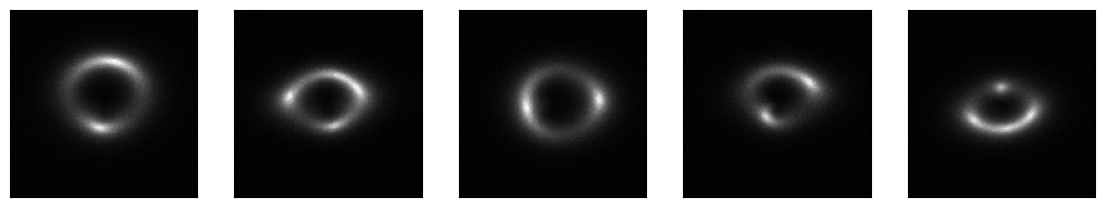

Class : Spherical substructure 


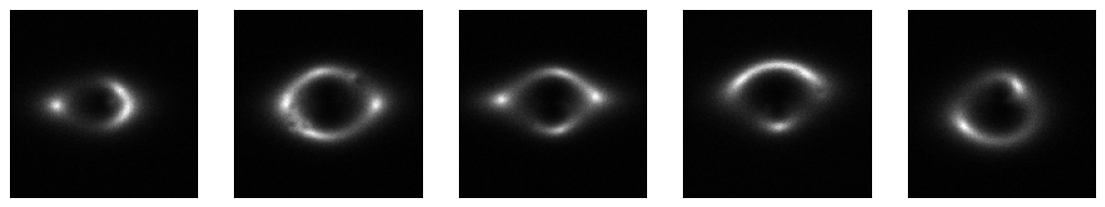

Class : Vortex substructure 


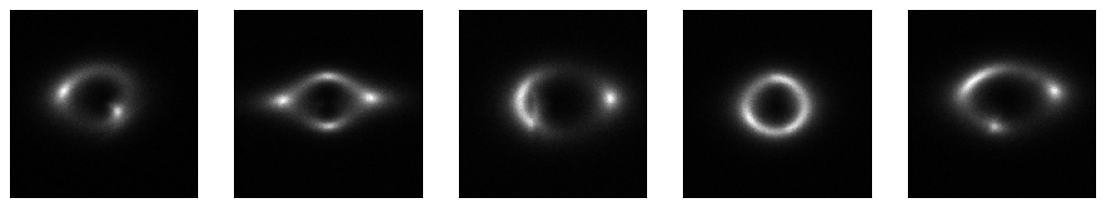

In [ ]:
# Defining the input paths for different classes
train_path1 = './dataset/train/no'  # Path for samples with no substructure
train_files1 = [os.path.join(train_path1, f) for f in os.listdir(train_path1) if f.endswith(".npy")]

train_path2 = './dataset/train/sphere'  # Path for samples with spherical substructure
train_files2 = [os.path.join(train_path2, f) for f in os.listdir(train_path2) if f.endswith(".npy")]

train_path3 = './dataset/train/vort'  # Path for samples with vortex substructure
train_files3 = [os.path.join(train_path3, f) for f in os.listdir(train_path3) if f.endswith(".npy")]

# Number of samples to display per class
n = 5

# Plotting the samples with no substructure
print('Class : no substructure ')
plt.rcParams['figure.figsize'] = [14, 14]  # Set the size of the plot
for i, image in enumerate(train_files1[:n], 1):
    ax = plt.subplot(1, n, i)  # Creating subplot
    plt.imshow(np.load(image).reshape(150, 150), cmap='gray')  # Loading and displaying the image
    ax.get_xaxis().set_visible(False)  # Hide x-axis
    ax.get_yaxis().set_visible(False)  # Hide y-axis
plt.show()

# Plotting the samples with spherical substructure
print("Class : Spherical substructure ")
plt.rcParams['figure.figsize'] = [14, 14]
for i, image in enumerate(train_files2[:n], 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(np.load(image).reshape(150, 150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plotting the samples with vortex substructure
print("Class : Vortex substructure ")
plt.rcParams['figure.figsize'] = [14, 14]
for i, image in enumerate(train_files3[:n], 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(np.load(image).reshape(150, 150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Creating Pytorch format Dataset and Dataloder

In [ ]:
batch_size = 32  # Batch size for training

def load_img(path):

    tensor = torch.from_numpy(np.load(path))
    tensor = tensor.type('torch.FloatTensor')
    return tensor

def transform_img(img):
      transformer = transforms.Compose([
          transforms.Resize((150, 150)),
          transforms.RandomHorizontalFlip(),
          transforms.RandomVerticalFlip(),
          transforms.RandomRotation(20),
          transforms.Normalize(mean=[0.5], std=[0.5])
      ])
      img = transformer(img)
      return img

# creating training dataset in pytorch format
train_path = "/content/dataset/train"
train_data = torchvision.datasets.DatasetFolder(root=train_path, loader=load_img,transform= transform_img, extensions="npy")
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# creating validation dataset in pytorch format
val_path = "/content/dataset/val"
val_data = torchvision.datasets.DatasetFolder(root=val_path, loader=load_img,transform=transform_img, extensions="npy")
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

print("Training Classes: " + str(train_data.class_to_idx))  # Display classes and their indices
print("Validation Classes: " + str(val_data.class_to_idx))

Training Classes: {'no': 0, 'sphere': 1, 'vort': 2}
Validation Classes: {'no': 0, 'sphere': 1, 'vort': 2}


# EfficientNetB0 Model

In [ ]:
model = models.efficientnet_b0(weights=models.efficientnet.EfficientNet_B0_Weights.DEFAULT)
print(model)
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) # replaced a 1-channel inpur layer

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 123MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.classifier[1] = nn.Linear(in_features=1280, out_features=3, bias=True) # Added a 3 class classifier fully connected layer

# Number of trainable Parameters

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print the number of parameters in your CustomDenseNet model
num_params = count_parameters(model)
print(f"Total Trainable Parameters: {num_params}")


Total Trainable Parameters: 4010815


# Connecting Model with GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training the Model

Epoch 1/50
Train Loss: 1.0873, Train Acc: 0.3734
ROC AUC Score: 0.5585


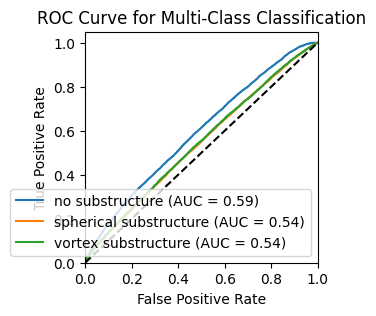

Epoch 2/50
Train Loss: 0.7610, Train Acc: 0.6522
ROC AUC Score: 0.8150


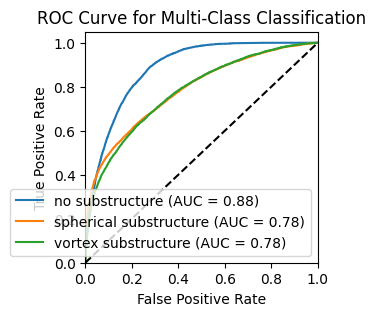

Epoch 3/50
Train Loss: 0.5152, Train Acc: 0.7912
ROC AUC Score: 0.9144


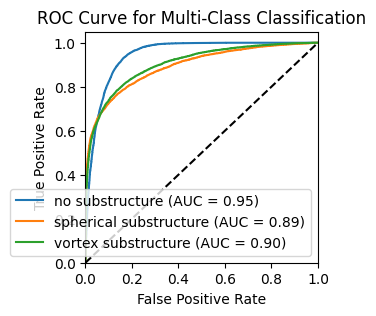

Epoch 4/50
Train Loss: 0.4310, Train Acc: 0.8312
ROC AUC Score: 0.9388


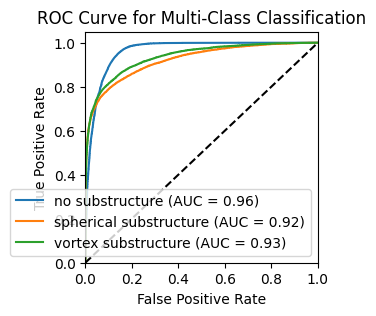

Epoch 5/50
Train Loss: 0.3729, Train Acc: 0.8557
ROC AUC Score: 0.9526


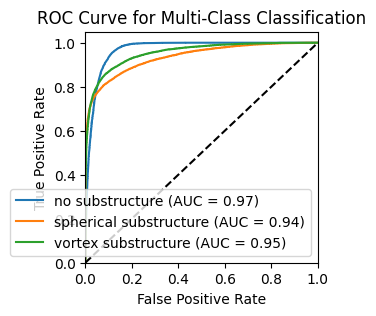

Epoch 6/50
Train Loss: 0.3461, Train Acc: 0.8665
ROC AUC Score: 0.9593


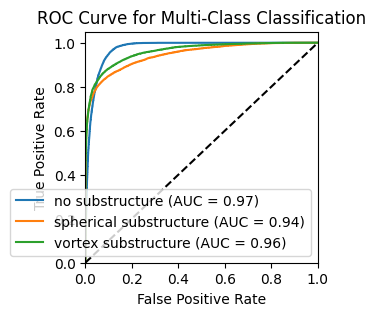

Epoch 7/50
Train Loss: 0.3169, Train Acc: 0.8809
ROC AUC Score: 0.9647


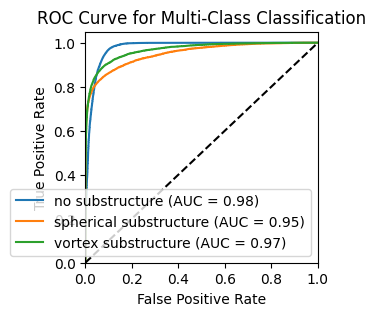

Epoch 8/50
Train Loss: 0.2942, Train Acc: 0.8902
ROC AUC Score: 0.9696


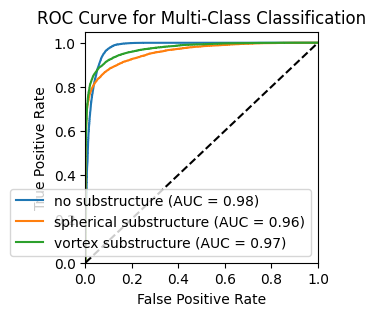

Epoch 9/50
Train Loss: 0.2838, Train Acc: 0.8940
ROC AUC Score: 0.9715


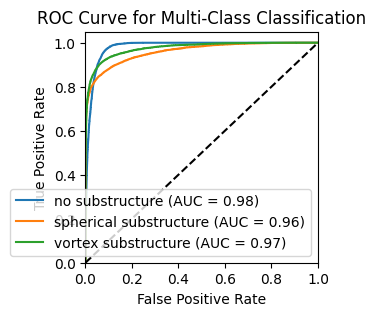

Epoch 10/50
Train Loss: 0.2719, Train Acc: 0.8994
ROC AUC Score: 0.9732


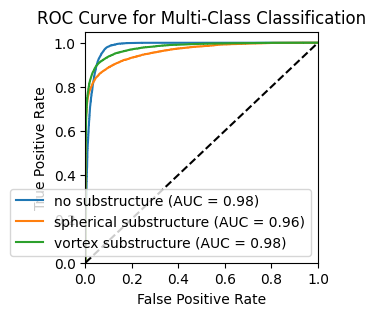

Epoch 11/50
Train Loss: 0.2535, Train Acc: 0.9065
ROC AUC Score: 0.9769


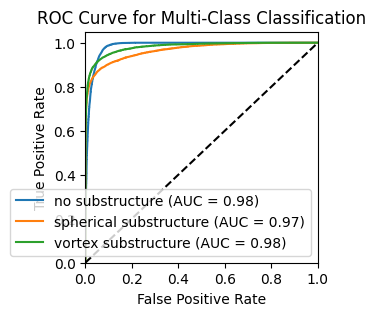

Epoch 12/50
Train Loss: 0.2513, Train Acc: 0.9078
ROC AUC Score: 0.9769


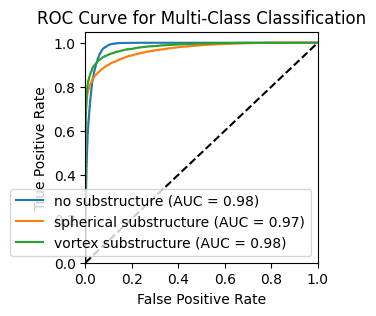

Epoch 13/50
Train Loss: 0.2421, Train Acc: 0.9094
ROC AUC Score: 0.9783


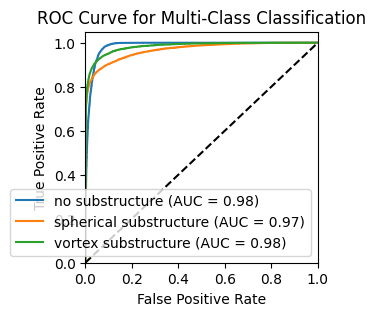

Epoch 14/50
Train Loss: 0.2386, Train Acc: 0.9125
ROC AUC Score: 0.9790


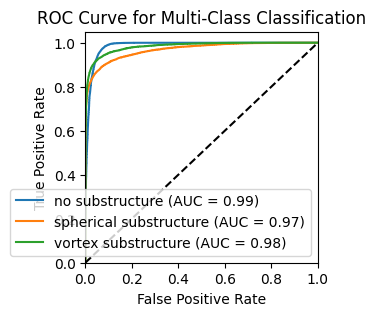

Epoch 15/50
Train Loss: 0.2335, Train Acc: 0.9146
ROC AUC Score: 0.9796


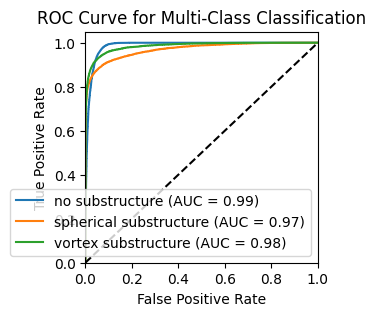

Epoch 16/50
Train Loss: 0.2240, Train Acc: 0.9177
ROC AUC Score: 0.9813


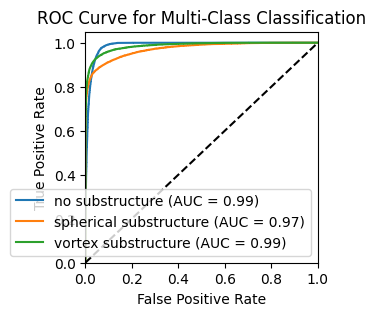

Epoch 17/50
Train Loss: 0.2212, Train Acc: 0.9188
ROC AUC Score: 0.9810


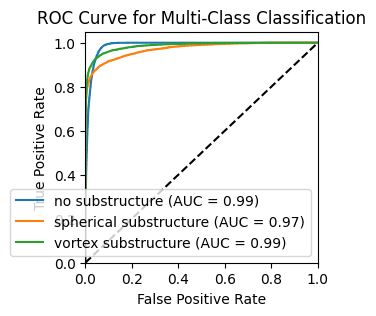

Epoch 18/50
Train Loss: 0.2134, Train Acc: 0.9207
ROC AUC Score: 0.9826


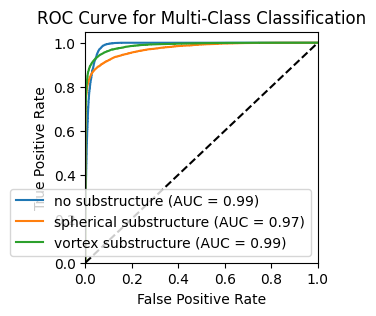

Epoch 19/50
Train Loss: 0.2079, Train Acc: 0.9230
ROC AUC Score: 0.9836


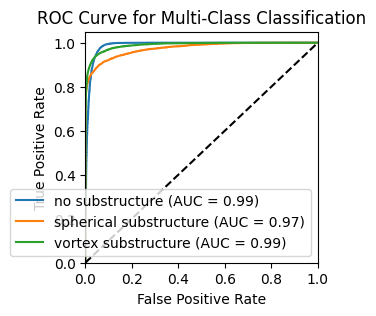

Epoch 20/50
Train Loss: 0.2017, Train Acc: 0.9267
ROC AUC Score: 0.9842


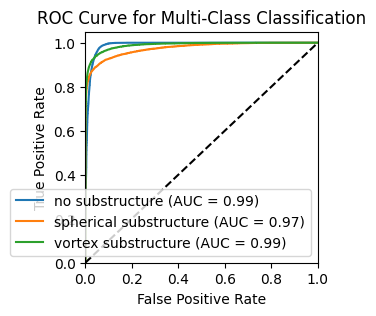

Epoch 21/50
Train Loss: 0.1969, Train Acc: 0.9277
ROC AUC Score: 0.9851


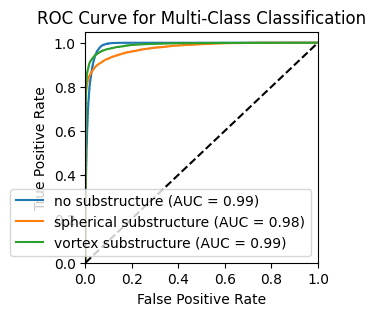

Epoch 22/50
Train Loss: 0.1981, Train Acc: 0.9271
ROC AUC Score: 0.9846


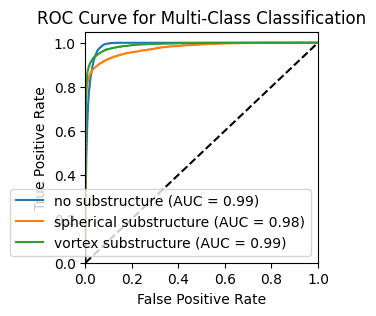

Epoch 23/50
Train Loss: 0.1921, Train Acc: 0.9306
ROC AUC Score: 0.9855


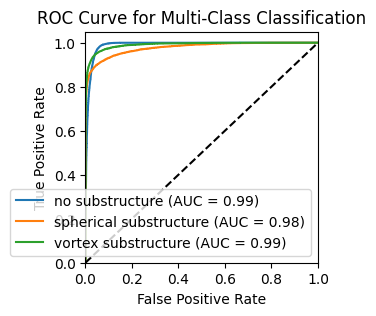

Epoch 24/50
Train Loss: 0.1882, Train Acc: 0.9307
ROC AUC Score: 0.9863


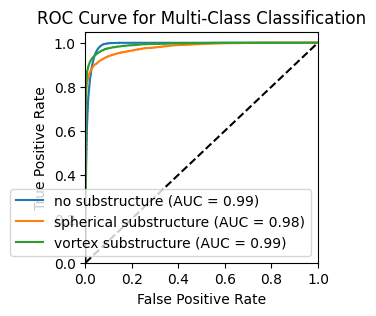

Epoch 25/50
Train Loss: 0.1909, Train Acc: 0.9318
ROC AUC Score: 0.9857


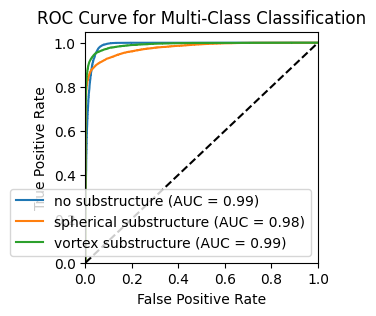

Epoch 26/50
Train Loss: 0.1832, Train Acc: 0.9334
ROC AUC Score: 0.9869


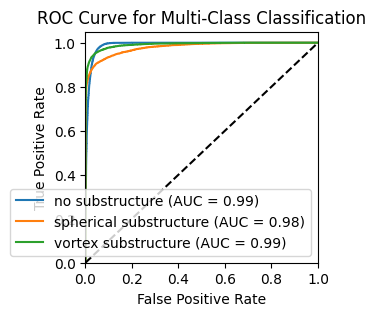

Epoch 27/50
Train Loss: 0.1788, Train Acc: 0.9348
ROC AUC Score: 0.9873


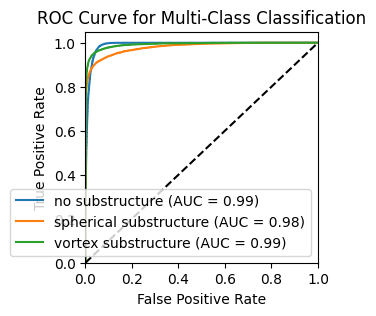

Epoch 28/50
Train Loss: 0.1763, Train Acc: 0.9362
ROC AUC Score: 0.9875


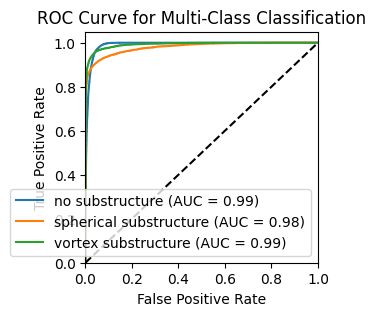

Epoch 29/50
Train Loss: 0.1770, Train Acc: 0.9348
ROC AUC Score: 0.9871


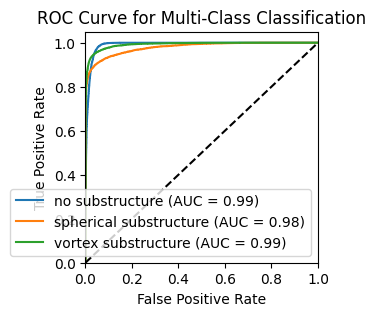

Epoch 30/50
Train Loss: 0.1709, Train Acc: 0.9375
ROC AUC Score: 0.9881


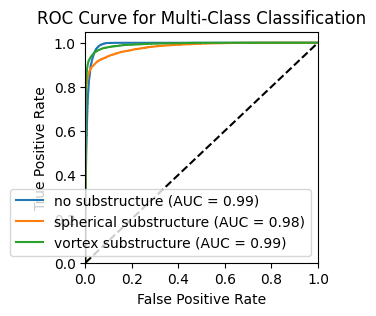

Epoch 31/50
Train Loss: 0.1724, Train Acc: 0.9370
ROC AUC Score: 0.9880


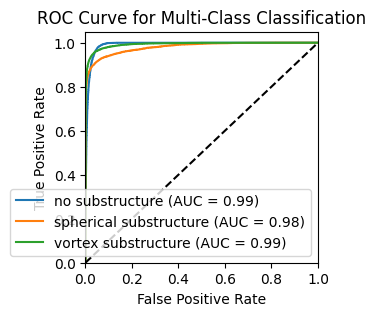

Epoch 32/50
Train Loss: 0.1685, Train Acc: 0.9377
ROC AUC Score: 0.9881


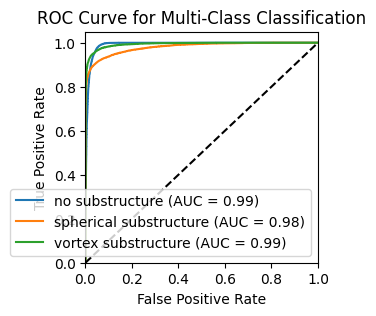

Epoch 33/50
Train Loss: 0.1692, Train Acc: 0.9390
ROC AUC Score: 0.9882


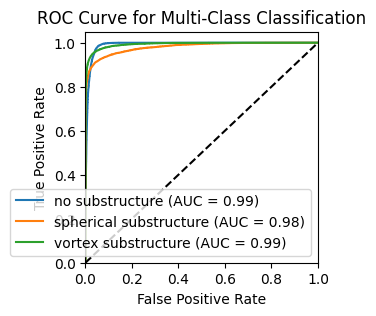

Epoch 34/50
Train Loss: 0.1560, Train Acc: 0.9441
ROC AUC Score: 0.9896


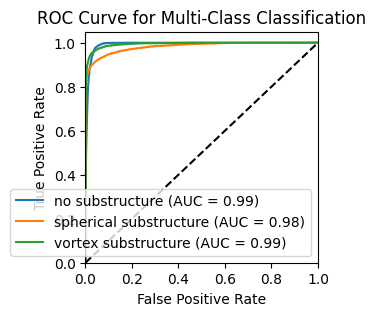

Epoch 35/50
Train Loss: 0.1619, Train Acc: 0.9405
ROC AUC Score: 0.9890


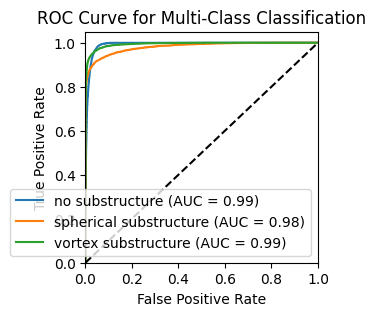

Epoch 36/50
Train Loss: 0.1566, Train Acc: 0.9436
ROC AUC Score: 0.9895


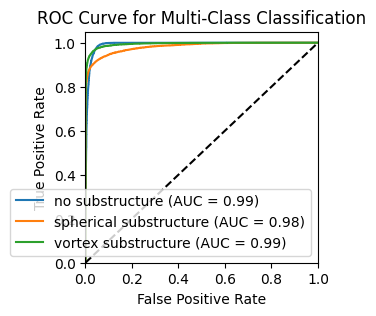

Epoch 37/50
Train Loss: 0.1583, Train Acc: 0.9429
ROC AUC Score: 0.9894


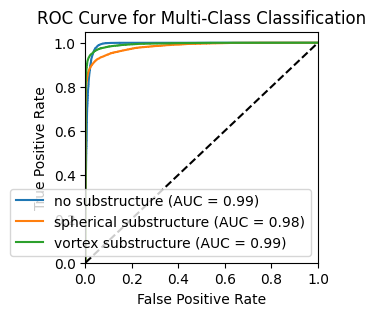

Epoch 38/50
Train Loss: 0.1507, Train Acc: 0.9451
ROC AUC Score: 0.9901


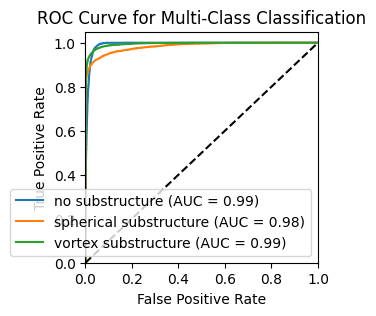

Epoch 39/50
Train Loss: 0.1616, Train Acc: 0.9415
ROC AUC Score: 0.9885


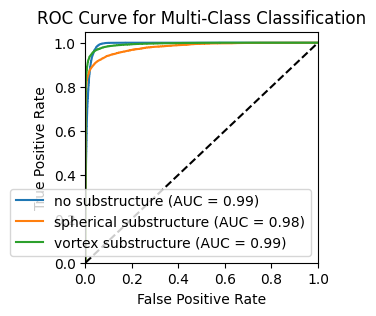

Epoch 40/50
Train Loss: 0.1528, Train Acc: 0.9451
ROC AUC Score: 0.9900


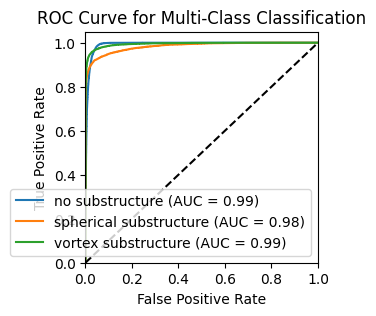

Epoch 41/50
Train Loss: 0.1507, Train Acc: 0.9454
ROC AUC Score: 0.9900


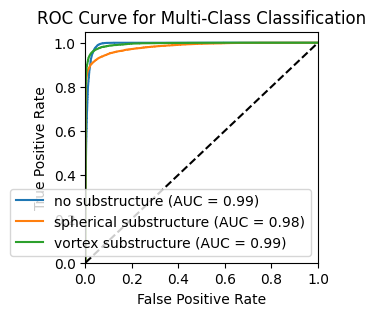

Epoch 42/50
Train Loss: 0.1494, Train Acc: 0.9453
ROC AUC Score: 0.9898


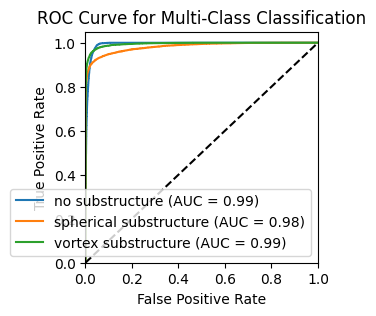

Epoch 43/50
Train Loss: 0.1474, Train Acc: 0.9465
ROC AUC Score: 0.9903


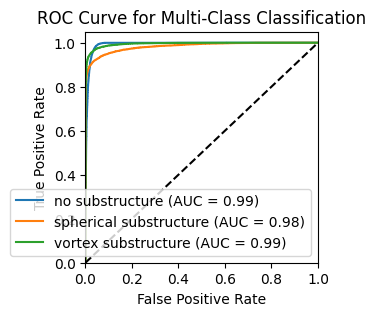

Epoch 44/50
Train Loss: 0.1495, Train Acc: 0.9463
ROC AUC Score: 0.9898


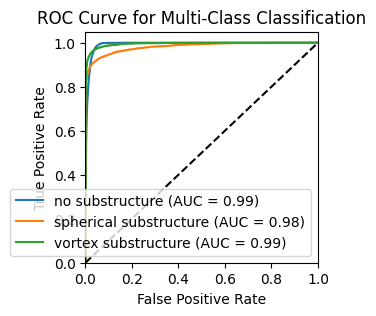

Epoch 45/50
Train Loss: 0.1456, Train Acc: 0.9469
ROC AUC Score: 0.9904


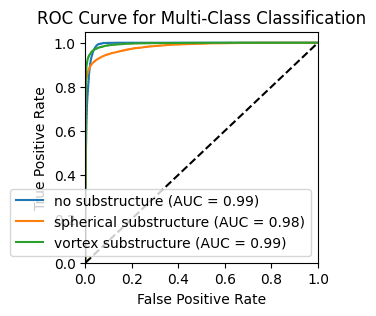

Epoch 46/50
Train Loss: 0.1418, Train Acc: 0.9491
ROC AUC Score: 0.9914


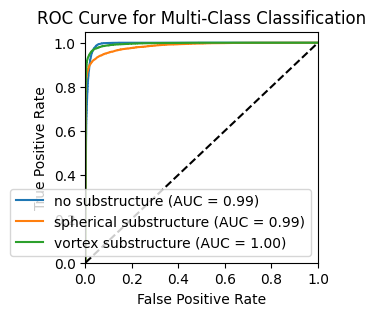

Epoch 47/50
Train Loss: 0.1412, Train Acc: 0.9499
ROC AUC Score: 0.9912


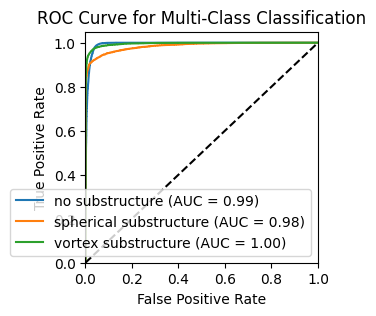

Epoch 48/50
Train Loss: 0.1406, Train Acc: 0.9498
ROC AUC Score: 0.9913


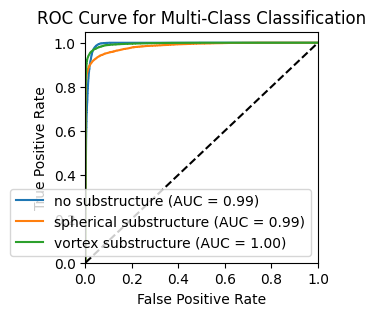

Epoch 49/50
Train Loss: 0.1384, Train Acc: 0.9496
ROC AUC Score: 0.9913


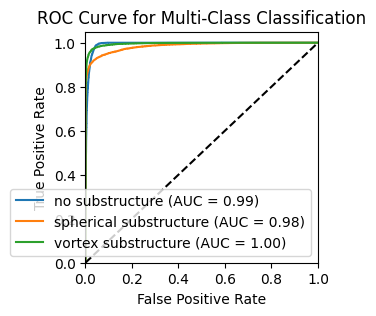

Epoch 50/50
Train Loss: 0.1402, Train Acc: 0.9501
ROC AUC Score: 0.9911


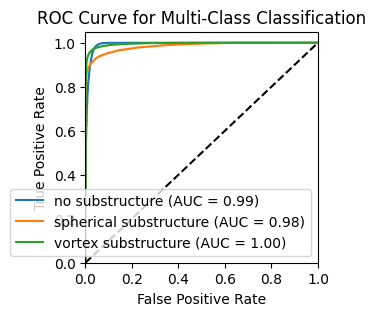

In [ ]:

# Training parameters
num_epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    model.train()  # Set model to training mode

    train_loss = 0.0
    correct_predictions = 0
    total_samples = 0  # Keep track of total samples

    y_true = []
    y_scores = []

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        correct_predictions += (preds == labels).sum()
        total_samples += labels.size(0)  # Accumulate total number of samples

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        y_true.extend(labels.cpu().numpy())  # Convert labels to NumPy
        y_scores.extend(outputs.detach().cpu().numpy())  # Convert outputs to NumPy

    # Compute average loss and accuracy
    train_loss /= len(train_loader)
    train_acc = correct_predictions / total_samples  # Correct accuracy computation

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    # Convert lists to NumPy arrays for ROC-AUC calculation
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    # ROC-AUC computation
    n_classes = len(train_data.class_to_idx)  #  len(class_dict) # or len(np.unique(y_true))]
    fpr, tpr, roc_auc = {}, {}, []

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_scores[:, i])
        roc_auc.append(roc_auc_score((y_true == i).astype(int), y_scores[:, i]))

    # Average AUC score
    roc_score = np.mean(roc_auc)
    print(f"ROC AUC Score: {roc_score:.4f}")

    # Plot ROC curve
    plt.figure(figsize=(3,3))
    class_dict = {0: "no substructure", 1: "spherical substructure", 2: "vortex substructure"}

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"{class_dict[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class Classification')
    plt.legend(loc="lower right")
    plt.show()

# Save trained model
torch.save(model.state_dict(), "efficientnet_model.pth")


# Evaluating the model on Validation data

Val Loss: 0.1584, Val Acc: 0.9480
ROC AUC Score: 0.9895


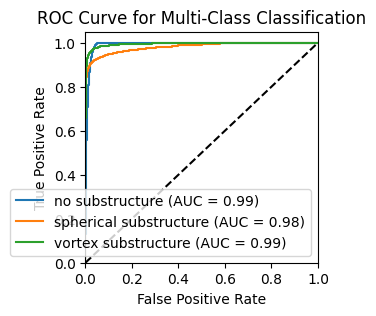

In [ ]:
model.eval()  # Set model to evaluation mode

val_loss = 0.0
correct_predictions = 0
total_samples = 0

y_true = []
y_scores = []

with torch.no_grad():  # Disable gradient computation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0)

        loss = criterion(outputs, labels)
        val_loss += loss.item() * labels.size(0)  # Accumulate loss

        y_true.extend(labels.cpu().numpy())
        y_scores.extend(outputs.cpu().numpy())

# Compute average loss and accuracy
val_loss /= total_samples
val_acc = correct_predictions / total_samples

print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Convert lists to NumPy arrays for ROC-AUC calculation
y_true = np.array(y_true)
y_scores = np.array(y_scores)

    # ROC-AUC computation
n_classes = len(val_data.class_to_idx)  #  len(class_dict) # or len(np.unique(y_true))]
fpr, tpr, roc_auc = {}, {}, []

for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_true == i).astype(int), y_scores[:, i])
        roc_auc.append(roc_auc_score((y_true == i).astype(int), y_scores[:, i]))

    # Average AUC score
roc_score = np.mean(roc_auc)
print(f"ROC AUC Score: {roc_score:.4f}")

    # Plot ROC curve
plt.figure(figsize=(3,3))
class_dict = {0: "no substructure", 1: "spherical substructure", 2: "vortex substructure"}

for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"{class_dict[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
torch.save(model.state_dict(), "efficientnet_model.pth")
